In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.under_sampling import NearMiss

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_reg = pd.read_csv('../data/Lab3_Mrdak_MO-221.csv')
df_reg.head()

,Unnamed: 0,date,appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,RH_8,T9,RH_9,T_out,press_mm_hg,RH_out,windspeed,visibility,tdewpoint,weekday
0,0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,...,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,Monday
1,1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,...,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,Monday
2,2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,...,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,Monday
3,3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,...,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,Monday
4,4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,...,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,Monday


In [4]:
df_class = pd.read_csv('../data/Lab4_Mrdak_MO-221.csv')
df_class.head()

,Unnamed: 0,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.1,0
1,1,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.7,0
2,2,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.4,0
3,3,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.7,0
4,4,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.4,0


## Удаление ненужных столбцов

In [5]:
df_reg = df_reg.drop(['Unnamed: 0', 'date', 'weekday'], axis=1)
df_reg.head()

,appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,press_mm_hg,RH_out,windspeed,visibility,tdewpoint
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9


In [6]:
df_class = df_class.drop(['Unnamed: 0', 'name'], axis=1)
df_class.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0.016016,0.035813,56014.078517,1.024333e+06,26.1,0
1,0.030518,0.068240,7864.348060,3.268186e+07,24.7,0
2,0.055533,0.124177,55257.544508,6.538636e+07,23.4,0
3,0.019256,0.043057,41531.404722,1.260796e+07,25.7,0
4,0.139494,0.311918,67639.394481,7.130590e+07,21.4,0


## Выделение целевого признака для обоих датасетов

### Регрессия

In [7]:
y_reg = df_reg["appliances"]
X_reg = df_reg.drop(["appliances"], axis=1)

### Классификация

In [8]:
y_class = df_class["hazardous"]
X_class = df_class.drop(["hazardous"], axis=1)

## Балансировка

In [9]:
nm = NearMiss()
X_class, y_class = nm.fit_resample(X_class, y_class.ravel())

## Масштабирование

In [10]:
from sklearn.preprocessing import StandardScaler
sc_reg = StandardScaler()
X_reg = sc_reg.fit_transform(X_reg)

In [11]:
sc_class = StandardScaler()
X_class = sc_class.fit_transform(X_class)

## Создание методов для тестирования

### Регрессия

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt

def metrics(y_test, y_pred):
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
    print(f'R^2: {r2_score(y_test, y_pred)}')

In [13]:
def test_reg(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)
  lr = LinearRegression().fit(X_train, y_train)
  metrics(y_test, lr.predict(X_test))

In [14]:
test_reg(X_reg, y_reg)

MAE: 16.70398496463685
MSE: 513.7108819601522
RMSE: 22.665190975594097
MAPE: 0.28016483857321156
R^2: 0.3664209329316144


### Классификация

In [15]:
def test_class(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)
  lr = LogisticRegression().fit(X_train, y_train)
  print(classification_report(y_test, lr.predict(X_test)))

In [16]:
test_class(X_class, y_class)

              precision    recall  f1-score   support

           0       0.97      0.79      0.88      1288
           1       0.83      0.98      0.90      1288

    accuracy                           0.89      2576
   macro avg       0.90      0.89      0.89      2576
weighted avg       0.90      0.89      0.89      2576



# Снижение размерности

## VarianceThreshold

In [17]:
from sklearn.feature_selection import VarianceThreshold

In [18]:
vt = VarianceThreshold(1)
X_reg_vt = vt.fit_transform(X_reg)
X_reg_vt.shape

(17597, 6)

In [19]:
test_reg(X_reg_vt, y_reg)

MAE: 18.97562182923287
MSE: 636.8446425045875
RMSE: 25.2357809965253
MAPE: 0.31793355714438787
R^2: 0.21455540726339073


In [20]:
X_class_vt = vt.fit_transform(X_class)
X_class_vt.shape

(12878, 2)

In [21]:
test_class(X_class_vt, y_class)

              precision    recall  f1-score   support

           0       0.94      0.80      0.87      1288
           1       0.83      0.95      0.89      1288

    accuracy                           0.88      2576
   macro avg       0.89      0.88      0.88      2576
weighted avg       0.89      0.88      0.88      2576



## SelectKBest

In [22]:
from sklearn.feature_selection import SelectKBest

In [23]:
skb_reg = SelectKBest(k=15)
X_reg_skb = skb_reg.fit_transform(X_reg, y_reg)
test_reg(X_reg_skb, y_reg)

MAE: 17.948407593292668
MSE: 582.8712714660294
RMSE: 24.142727092564115
MAPE: 0.30086902878348215
R^2: 0.28112280785779353


In [24]:
skb_class = SelectKBest(k=2)
X_class_skb = skb_class.fit_transform(X_class, y_class)
test_class(X_class_skb, y_class)

              precision    recall  f1-score   support

           0       0.98      0.79      0.87      1288
           1       0.82      0.98      0.90      1288

    accuracy                           0.89      2576
   macro avg       0.90      0.89      0.89      2576
weighted avg       0.90      0.89      0.89      2576



In [25]:
X_reg_skb = pd.DataFrame(X_reg_skb, columns=skb_reg.get_feature_names_out())
X_reg_skb.head()

,x0,x1,x3,x5,x7,x9,x11,x12,x13,x15,x16,x17,x18,x19,x21
0,3.529821,-1.120785,-0.502294,-1.239148,-0.907751,-1.330155,-0.119145,0.955186,-1.466295,-1.962166,1.129838,-1.229047,0.954814,-0.132913,0.793236
1,3.529821,-1.120785,-0.502294,-1.239148,-0.907751,-1.330155,-0.151217,0.948888,-1.466295,-1.962166,1.122786,-1.212467,0.962018,-0.155596,0.793236
2,3.529821,-1.120785,-0.502294,-1.239148,-0.943565,-1.330155,-0.196559,0.919355,-1.466295,-1.962166,1.097143,-1.245626,0.947609,-0.176388,0.793236
3,4.858128,-1.120785,-0.502294,-1.239148,-0.961473,-1.330155,-0.217572,0.928041,-1.498038,-2.013136,1.070218,-1.245626,0.923595,-0.199070,0.793236
4,4.858128,-1.120785,-0.502294,-1.239148,-0.961473,-1.312009,-0.228631,0.975925,-1.466295,-2.013136,1.070218,-1.245626,0.923595,-0.221752,0.793236


In [26]:
X_class_skb = pd.DataFrame(X_class_skb, columns=skb_class.get_feature_names_out())
X_class_skb.head()

,x0,x4
0,0.895676,-0.839079
1,-1.358699,2.371637
2,-0.549921,0.074540
3,0.811314,-0.804274
4,-1.168858,1.205686


## RFE

In [27]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [28]:
tree_reg = DecisionTreeRegressor().fit(X_reg, y_reg)

In [29]:
rfe_reg = RFE(estimator=tree_reg, n_features_to_select=10, step=1).fit(X_reg, y_reg)
X_rfe_reg = pd.DataFrame(rfe_reg.transform(X_reg), columns=rfe_reg.get_feature_names_out())
X_rfe_reg

,x0,x2,x3,x10,x12,x15,x16,x18,x20,x21
0,3.529821,1.898045,-0.502294,0.468781,0.955186,-1.962166,1.129838,0.954814,-3.007110,0.793236
1,3.529821,1.668064,-0.502294,0.468781,0.948888,-1.962166,1.122786,0.962018,-2.993485,0.793236
2,3.529821,1.567925,-0.502294,0.456555,0.919355,-1.962166,1.097143,0.947609,-2.979861,0.793236
3,4.858128,1.508521,-0.502294,0.456555,0.928041,-2.013136,1.070218,0.923595,-2.966236,0.793236
4,4.858128,1.576412,-0.502294,0.456555,0.975925,-2.013136,1.070218,0.923595,-2.952611,0.793236
...,...,...,...,...,...,...,...,...,...,...
17592,-0.455098,1.862402,2.632941,0.127193,-1.756793,1.269293,1.629882,1.240106,-0.043757,-1.713762
17593,-0.455098,1.795360,2.618450,0.142013,-1.756793,1.299874,1.507435,1.248134,-0.050569,-1.713762
17594,-0.455098,1.710496,2.622797,0.149422,-1.756793,1.333854,1.426980,1.246590,-0.050569,-1.691177
17595,-0.455098,1.634119,2.582223,0.157573,-1.756793,1.350844,1.355627,1.257397,-0.050569,-1.668591


In [30]:
test_reg(X_rfe_reg, y_reg)

MAE: 17.889480389592688
MSE: 563.2695337784901
RMSE: 23.733300102987997
MAPE: 0.30114286430985
R^2: 0.30529837258323334


In [31]:
tree_class = DecisionTreeClassifier().fit(X_class, y_class)

In [32]:
rfe_class = RFE(estimator=tree_class, n_features_to_select=2, step=1).fit(X_class, y_class)
X_rfe_class = pd.DataFrame(rfe_class.transform(X_class), columns=rfe_class.get_feature_names_out())
X_rfe_class

,x0,x2
0,0.895676,-0.271907
1,-1.358699,-0.331233
2,-0.549921,-1.010881
3,0.811314,-0.508347
4,-1.168858,1.424533
...,...,...
12873,0.308327,-0.231824
12874,-0.223847,0.682192
12875,0.604099,2.804179
12876,0.895676,-0.022183


In [33]:
test_class(X_rfe_class, y_class)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1288
           1       0.84      0.86      0.85      1288

    accuracy                           0.85      2576
   macro avg       0.85      0.85      0.85      2576
weighted avg       0.85      0.85      0.85      2576



## PCA

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca_reg = PCA(n_components=12)
X_pca_reg = pca_reg.fit_transform(X_reg, y_reg)
X_pca_reg.shape

(17597, 12)

In [36]:
sum(pca_reg.explained_variance_ratio_)

0.9653123149106743

In [37]:
test_reg(X_pca_reg, y_reg)

MAE: 17.508022878896508
MSE: 543.7643298345956
RMSE: 23.31875489460352
MAPE: 0.29574209212543767
R^2: 0.3293548785902636


In [38]:
pca_class = PCA(n_components=3)
X_pca_class = pca_class.fit_transform(X_class, y_class)
X_pca_class.shape

(12878, 3)

In [39]:
sum(pca_class.explained_variance_ratio_)

0.9718814478387766

In [40]:
test_class(X_pca_class, y_class)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1288
           1       0.84      0.89      0.87      1288

    accuracy                           0.86      2576
   macro avg       0.86      0.86      0.86      2576
weighted avg       0.86      0.86      0.86      2576



## tSNE

In [41]:
from sklearn.manifold import TSNE

In [42]:
tsne_reg = TSNE(n_components=3)
X_tsne_reg = tsne_reg.fit_transform(X_reg)
X_tsne_reg.shape

(17597, 3)

In [43]:
test_reg(X_pca_reg, y_reg)

MAE: 17.637690488147904
MSE: 571.6572917723197
RMSE: 23.909355737290785
MAPE: 0.2989408757111465
R^2: 0.2949534332970567


In [44]:
tsne_class = TSNE(n_components=2)
X_tsne_class = tsne_class.fit_transform(X_class)
X_tsne_class.shape

(12878, 2)

In [45]:
test_class(X_tsne_class, y_class)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1288
           1       0.84      0.86      0.85      1288

    accuracy                           0.85      2576
   macro avg       0.85      0.85      0.85      2576
weighted avg       0.85      0.85      0.85      2576



## Isomap

In [46]:
from sklearn.manifold import Isomap

In [47]:
isomap_reg = Isomap(n_components=4)
X_isomap_reg = isomap_reg.fit_transform(X_reg)
X_isomap_reg.shape

(17597, 4)

In [48]:
test_reg(X_isomap_reg, y_reg)

MAE: 22.24662952353515
MSE: 792.76908009616
RMSE: 28.156155279017767
MAPE: 0.38034726042690814
R^2: 0.0222478989515571


In [49]:
isomap_class = Isomap(n_components=2)
X_isomap_class = isomap_class.fit_transform(X_class)
X_isomap_class.shape

(12878, 2)

In [50]:
test_class(X_isomap_class, y_class)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1288
           1       0.83      0.90      0.87      1288

    accuracy                           0.86      2576
   macro avg       0.86      0.86      0.86      2576
weighted avg       0.86      0.86      0.86      2576



# Задание 2

In [51]:
import sys
sys.path.append("..")
from models.PCA import myPCA

In [52]:
mypca_class = myPCA(2)
X_mypca_class = mypca_class.fit_transform(X_class)
X_mypca_class.shape

(12878, 2)

In [53]:
test_class(X_mypca_class, y_class)

              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1288
           1       0.81      0.96      0.88      1288

    accuracy                           0.87      2576
   macro avg       0.88      0.87      0.86      2576
weighted avg       0.88      0.87      0.86      2576



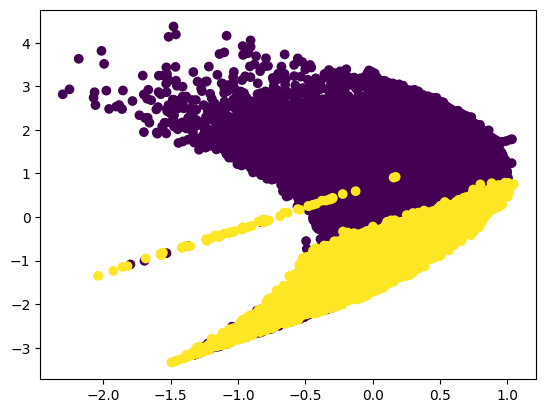

In [54]:
plt.scatter(X_mypca_class[:,0], X_mypca_class[:,1], c=y_class);

In [55]:
import sys
sys.path.append("..")
from models.KMeans import myKMeans

In [60]:
from sklearn.metrics import davies_bouldin_score, rand_score, silhouette_score, fowlkes_mallows_score, make_scorer
def metrics(model, X, Y): 
        print('\nВнутренние метрики')
        print('Силуэт:', silhouette_score(X, model.predict(X)))
        print('Индекс Дэвиса-Болдуина:', davies_bouldin_score(X, model.predict(X)))
        print('\nВнешние метрики')
        print('Индекс RAND:', rand_score(Y, model.predict(X)))
        print('Индекс Фоулкса – Мэллова', fowlkes_mallows_score(Y, model.predict(X)))

In [61]:
mykmeans = myKMeans(k=2, max_iter=500)

In [62]:
mykmeans.fit(X_mypca_class)

label = mykmeans.predict(X_mypca_class)
metrics(mykmeans, X_mypca_class, y_class)


Внутренние метрики
Силуэт: 0.5432084456348134
Индекс Дэвиса-Болдуина: 0.6543316148567895

Внешние метрики
Индекс RAND: 0.7273381633960744
Индекс Фоулкса – Мэллова 0.7302768078311399


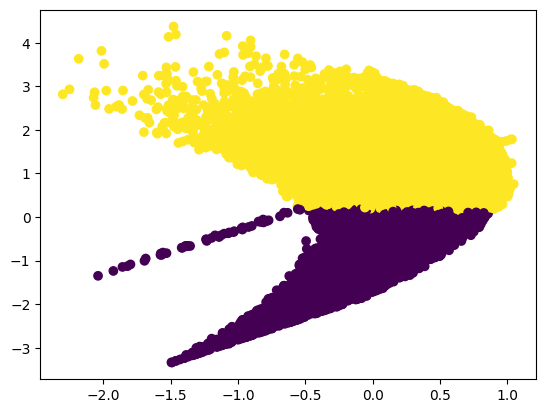

In [63]:
plt.scatter(X_mypca_class[:,0], X_mypca_class[:,1], c=label);